# Motorcycle Performance & Design Analysis

**Research Question:** Welche Faktoren beeinflussen die Leistung und das Design von Motorrädern?

Datensatz: Kaggle – Motorcycle Technical Specifications (1970–2022)

## 1. Setup & Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10,6)
sns.set_style("whitegrid")


## 2. Daten laden

In [2]:

# Pfad ggf. anpassen
df = pd.read_csv("data/all_bikez_curated.csv")
df.head()


C:\Users\julia\AppData\Local\Temp\ipykernel_36980\1747639555.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/all_bikez_curated.csv")


,Brand,Model,Year,Category,Rating,Displacement (ccm),Power (hp),Torque (Nm),Engine cylinder,Engine stroke,...,Dry weight (kg),Wheelbase (mm),Seat height (mm),Front brakes,Rear brakes,Front tire,Rear tire,Front suspension,Rear suspension,Color options
0,acabion,da vinci 650-vi,2011,Prototype / concept model,3.2,NaN,804.0,NaN,Electric,Electric,...,420.0,NaN,NaN,Single disc,Single disc,NaN,NaN,NaN,NaN,NaN
1,acabion,gtbo 55,2007,Sport,2.6,1300.0,541.0,420.0,In-line four,four-stroke,...,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,acabion,gtbo 600 daytona-vi,2011,Prototype / concept model,3.5,NaN,536.0,NaN,Electric,Electric,...,420.0,NaN,NaN,Single disc,Single disc,NaN,NaN,NaN,NaN,NaN
3,acabion,gtbo 600 daytona-vi,2021,Prototype / concept model,NaN,NaN,536.0,NaN,Electric,Electric,...,420.0,NaN,NaN,Single disc,Single disc,NaN,NaN,NaN,NaN,NaN
4,acabion,gtbo 70,2007,Prototype / concept model,3.1,1300.0,689.0,490.0,In-line four,four-stroke,...,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Custom made.


## 3. Erste Exploration

In [3]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                38472 non-null  object 
 1   Model                38444 non-null  object 
 2   Year                 38472 non-null  int64  
 3   Category             38472 non-null  object 
 4   Rating               21788 non-null  float64
 5   Displacement (ccm)   37461 non-null  float64
 6   Power (hp)           26110 non-null  float64
 7   Torque (Nm)          16634 non-null  float64
 8   Engine cylinder      38461 non-null  object 
 9   Engine stroke        38461 non-null  object 
 10  Gearbox              32675 non-null  object 
 11  Bore (mm)            28689 non-null  float64
 12  Stroke (mm)          28689 non-null  object 
 13  Fuel capacity (lts)  31704 non-null  float64
 14  Fuel system          27844 non-null  object 
 15  Fuel control         22008 non-null 

In [4]:

df.describe()


,Year,Rating,Displacement (ccm),Power (hp),Torque (Nm),Bore (mm),Fuel capacity (lts),Dry weight (kg),Wheelbase (mm),Seat height (mm)
count,38472.000000,21788.000000,37461.000000,26110.000000,16634.000000,28689.000000,31704.000000,22483.000000,25493.000000,24182.000000
mean,2003.195883,3.401574,552.515072,50.776040,64.527173,72.596713,13.286191,164.151532,1423.113521,789.253246
std,20.083372,0.355631,545.394956,52.082094,63.884654,18.758621,6.010670,85.085133,172.645438,105.492167
min,1894.000000,1.400000,25.000000,0.300000,1.500000,1.000000,0.500000,15.100000,725.000000,39.000000
25%,2000.000000,3.200000,125.000000,12.000000,12.200000,57.000000,8.200000,105.000000,1321.000000,743.000000
50%,2010.000000,3.400000,397.200000,30.000000,57.000000,73.000000,13.500000,145.000000,1422.000000,790.000000
75%,2016.000000,3.700000,805.000000,77.000000,102.000000,88.000000,17.500000,199.600000,1500.000000,830.000000
max,2022.000000,4.600000,8277.000000,804.000000,712.000000,176.000000,64.340000,1000.000000,3327.000000,7501.000000


## 4. Datenbereinigung

In [ ]:
cols = [
    'Brand',
    'Year',
    'Category',
    'Displacement (ccm)',
    'Power (hp)',
    'Torque (Nm)',
    'Dry weight (kg)',
    'Seat height (mm)',
    'Fuel capacity (lts)',
    'Wheelbase (mm)'
]

df_clean = df[cols].dropna()
df_clean.head()



,Brand,Year,Category,Displacement (ccm),Power (hp),Torque (Nm),Dry weight (kg),Seat height (mm),Fuel capacity (lts),Wheelbase (mm)
45,adiva,2019,Scooter,299.0,29.4,31.0,202.0,700.0,11.0,1560.0
46,adiva,2020,Scooter,299.0,29.4,30.1,202.0,700.0,12.2,1560.0
47,adiva,2018,Scooter,399.0,36.7,38.1,257.0,770.0,11.0,1560.0
48,adiva,2019,Scooter,399.0,36.7,38.1,257.0,770.0,11.0,1560.0
51,adiva,2018,Scooter,190.0,18.8,17.0,231.0,700.0,14.0,1751.0


## 5. Leistungsanalyse

### 5.1 Hubraum vs. Leistung

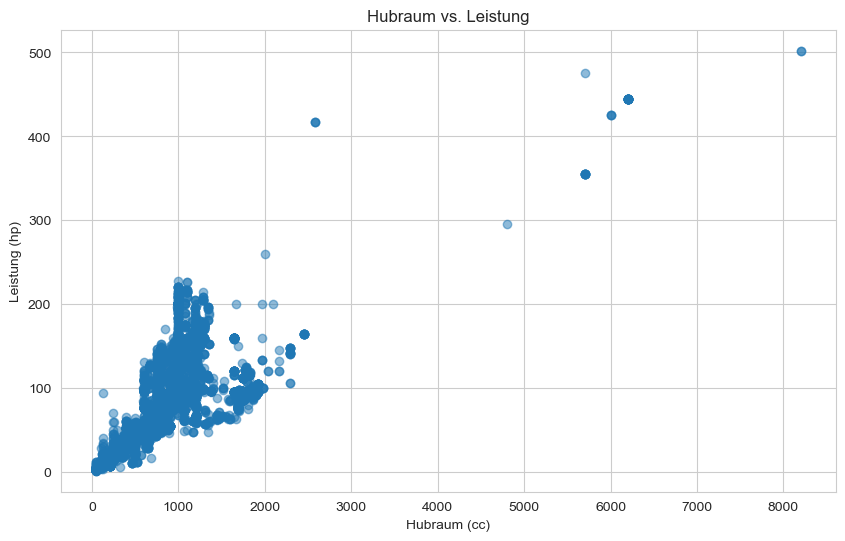

In [10]:

plt.scatter(df_clean['Displacement (ccm)'], df_clean['Power (hp)'], alpha=0.5)
plt.xlabel("Hubraum (cc)")
plt.ylabel("Leistung (hp)")
plt.title("Hubraum vs. Leistung")
plt.show()


### 5.2 Gewicht vs. Höchstgeschwindigkeit

In [ ]:

plt.scatter(df_clean['Dry weight (kg)'], df_clean['Top Speed (km/h)'], alpha=0.5)
plt.xlabel("Gewicht (kg)")
plt.ylabel("Top Speed (km/h)")
plt.title("Gewicht vs. Höchstgeschwindigkeit")
plt.show()


KeyError: 'Wet Weight (kg)'

## 6. Designanalyse

### 6.1 Sitzhöhe nach Kategorie

In [ ]:

df_clean.groupby('Category')['Seat Height (mm)'].mean().sort_values().plot(kind='bar')
plt.ylabel("Ø Sitzhöhe (mm)")
plt.title("Durchschnittliche Sitzhöhe nach Kategorie")
plt.show()


### 6.2 Tankgröße nach Kategorie

In [ ]:

df_clean.groupby('Category')['Fuel Capacity (L)'].mean().sort_values().plot(kind='bar')
plt.ylabel("Ø Tankgröße (L)")
plt.title("Durchschnittliche Tankgröße nach Kategorie")
plt.show()


## 7. Zeitliche Entwicklung

In [ ]:

df_clean.groupby('Year')['Power (hp)'].mean().plot()
plt.ylabel("Ø Leistung (hp)")
plt.title("Durchschnittliche Leistung über die Jahre")
plt.show()


## 8. Fazit

- Hubraum und Gewicht haben starken Einfluss auf die Leistung
- Motorradkategorien unterscheiden sich klar im Design
- Moderne Motorräder erreichen höhere Leistung trotz ähnlichem Gewicht